# Loading Images from the SBIG CCD

A Notebook showing some basic image analysis of the SBIG CCD data

In [3]:
#import statements may not all be needed
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

#Module for CCD processing
import ccdproc

#for 3 colour images
from astropy.visualization import make_lupton_rgb

#Aliging images
from astropy.wcs import WCS

#Nicer plot styles
from astropy.visualization import astropy_mpl_style, stretch, interval, mpl_normalize
plt.style.use(astropy_mpl_style)

#Plot inline
%matplotlib inline

# Location of data (this is where your data are)
file_root = "RawSBIGImages/"

In [11]:
#Import data
bias = fits.open(file_root+"bias_120_1.FIT.gz")

#Extract the image data (usually in extension 0)
biasimg=bias[0].data


# Get size of images
print,biasimg.shape



(<function print>, (1020, 1530))

In [12]:
#Really should do this on an average of bias frames

bias_med = np.median(biasimg, 0) 
bias_std = np.std(biasimg,axis=0)

read_noise=bias_std*.37
# Median of med-stacked bias, Mean of med-stacked bias, Min of med-stacked bias, Max of med-stacked bias, Read noise
np.median(bias_med), bias_med.mean(), bias_med.min(), bias_med.max(), read_noise


(1029.0,
 1030.0192810457515,
 1028.0,
 1092.0,
 array([2.47665862, 2.62962774, 2.40238219, ..., 4.33278044, 2.65697787,
        2.64264422]))

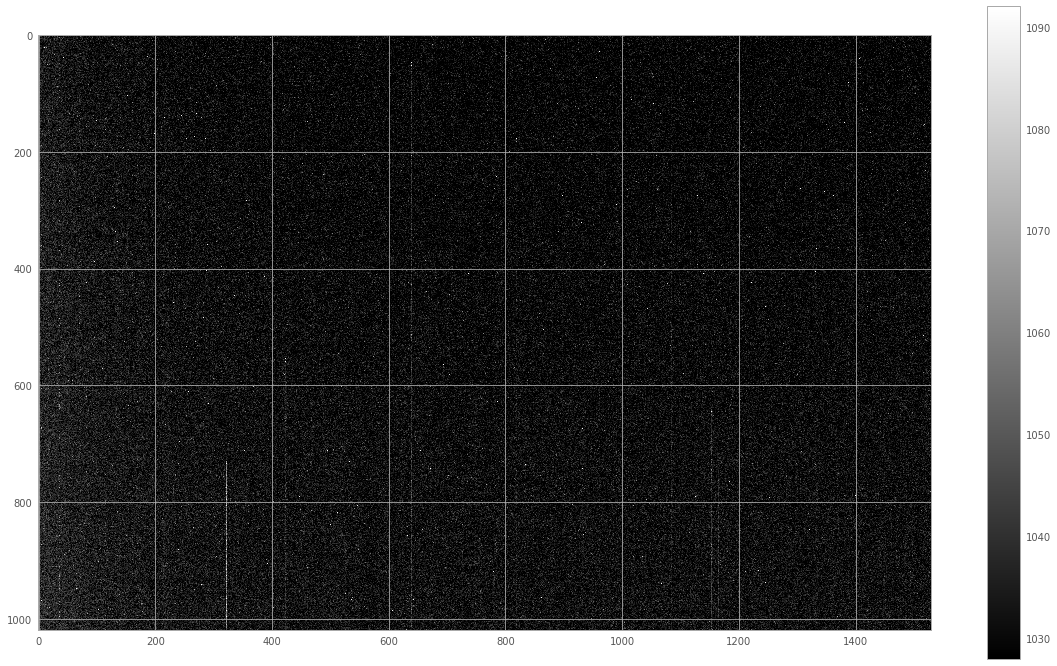

In [14]:
#Visualisation of bias frame
plt.imshow(biasimg, cmap='gray', aspect='equal', interpolation='none')
plt.colorbar() 
plt.clim(bias_med.min(), bias_med.max())
plt.gcf().set_size_inches(20,12)